## KNN Adding feature

In [58]:
import numpy as np
import pandas as pd # Needed for iloc.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [59]:
# Reading the data from the provided csv. 
alexa = pd.read_csv(r"C:\Users\ed2489\Desktop\knn\certificate features.alexa.csv")
phish = pd.read_csv(r"C:\Users\ed2489\Desktop\knn\certificate features.phish.csv")
c =y18=pd.concat([alexa,phish])
c.shape

(8398, 2208)

In [60]:
# change all the true or false to 0 or 1
for u in c.columns:
    if c[u].dtype == bool:
        c[u] = c[u].astype('int')

In [61]:
c

,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,wponabudget.com,reviews-by.ml,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com,class
0,www.yahoo.com,1,180,1,0,61,1,0,0,0,...,0,0,0,0,0,0,0,0,0,alexa
1,www.google.co.in,1,83,1,0,11,1,0,1,0,...,0,0,0,0,0,0,0,0,0,alexa
2,www.reddit.com,1,1100,1,0,826,1,0,0,0,...,0,0,0,0,0,0,0,0,0,alexa
3,world.taobao.com,1,74,1,0,61,1,1,0,0,...,0,0,0,0,0,0,0,0,0,alexa
4,www.google.co.jp,1,83,1,0,11,1,0,1,0,...,0,0,0,0,0,0,0,0,0,alexa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,paypal.com-infohelpcustomer.com,1,125,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,phish
1318,poderdevender.com,1,90,1,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,phish
1319,isma.cloud,1,190,1,0,17,1,0,0,0,...,0,0,0,0,0,0,0,0,0,phish
1320,cisagroup.net.elaiolado.com.gr,1,90,1,0,72,0,0,0,0,...,0,0,0,0,0,0,0,0,0,phish


check unique value of has_cert

In [62]:
c.has_cert.unique()

array([1])

blacklist website from database, try to merge to our dataset to see if any website on blacklist.

# check blacklist website

In [63]:
dga = pd.read_csv(r"dga_training.txt",header=None)
dga
# bamboolib live code export
dga.columns = [str(column) for column in dga.columns]
dga.head()

,0
0,URL
1,gllcsbqrbfch.com
2,hkgjjokkwodt.com
3,jjnehudfmclq.com
4,hieffvbcjitc.com


In [64]:
dga_test = pd.read_csv(r"test_domains.txt",header=None)

In [65]:
blacklist=pd.concat([dga,dga_test])
blacklist.head()

,0,0
0,URL,NaN
1,gllcsbqrbfch.com,NaN
2,hkgjjokkwodt.com,NaN
3,jjnehudfmclq.com,NaN
4,hieffvbcjitc.com,NaN


In [66]:
blacklist.columns=blacklist.iloc[0]
bad=blacklist.iloc[1:]
bad.head()

,URL,NaN
1,gllcsbqrbfch.com,NaN
2,hkgjjokkwodt.com,NaN
3,jjnehudfmclq.com,NaN
4,hieffvbcjitc.com,NaN
5,fckjmggtxchv.com,NaN


In [67]:
pd.merge(c,bad,left_on='domain',right_on='URL',how ='inner')

,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com,class,URL,NaN


As we see, there none macthing website, domain webset from our data none in this blacklist

# adding features using ipaddress package in python

In [70]:
import ipaddress
def checkip(domain):
    try:
        domain_ip=socket.gethostbyname(domain)
        return domain_ip
    except:
        return 'invalid'

In [71]:
checkip('gllcsbqrbfch.com')

'127.0.0.54'

In [72]:
unique_ips = c['domain'].unique()
unique_ips = pd.Series(unique_ips, index = unique_ips)

In [73]:
c['ip']=c['domain'].map(unique_ips.apply(checkip))
c

,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,reviews-by.ml,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com,class,ip
0,www.yahoo.com,1,180,1,0,61,1,0,0,0,...,0,0,0,0,0,0,0,0,alexa,98.138.219.232
1,www.google.co.in,1,83,1,0,11,1,0,1,0,...,0,0,0,0,0,0,0,0,alexa,64.233.176.94
2,www.reddit.com,1,1100,1,0,826,1,0,0,0,...,0,0,0,0,0,0,0,0,alexa,199.232.1.140
3,world.taobao.com,1,74,1,0,61,1,1,0,0,...,0,0,0,0,0,0,0,0,alexa,47.246.19.235
4,www.google.co.jp,1,83,1,0,11,1,0,1,0,...,0,0,0,0,0,0,0,0,alexa,64.233.185.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,paypal.com-infohelpcustomer.com,1,125,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,phish,invalid
1318,poderdevender.com,1,90,1,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,phish,108.161.131.171
1319,isma.cloud,1,190,1,0,17,1,0,0,0,...,0,0,0,0,0,0,0,0,phish,invalid
1320,cisagroup.net.elaiolado.com.gr,1,90,1,0,72,0,0,0,0,...,0,0,0,0,0,0,0,0,phish,invalid


In [74]:
print(c.groupby('ip').size())

ip
1.234.82.151        1
1.33.191.138        1
100.24.225.51       1
101.53.131.22       1
102.130.117.29      1
                 ... 
99.84.184.198       1
99.84.186.162       1
99.84.187.2         1
99.84.187.69        1
invalid           607
Length: 6655, dtype: int64


In [75]:
c=c[c.ip !='invalid']
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7791 entries, 0 to 1318
Columns: 2209 entries, domain to ip
dtypes: int32(4), int64(2202), object(3)
memory usage: 131.2+ MB


In [76]:
source= c[['ip']]
source.head()

,ip
0,98.138.219.232
1,64.233.176.94
2,199.232.1.140
3,47.246.19.235
4,64.233.185.94


In [77]:
import ipaddress
def checkip(ip):
    try:
        ip_private=ipaddress.ip_network(ip)
        return ip_private.__class__.__name__
    except:
        return 'invalid'

In [78]:
checkip('90.177.154.197')

'IPv4Network'

In [79]:
unique_ips = source['ip'].unique()
unique_ips = pd.Series(unique_ips, index = unique_ips)
c['Network_class']=c['ip'].map(unique_ips.apply(checkip))
c

C:\Users\ed2489\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com,class,ip,Network_class
0,www.yahoo.com,1,180,1,0,61,1,0,0,0,...,0,0,0,0,0,0,0,alexa,98.138.219.232,IPv4Network
1,www.google.co.in,1,83,1,0,11,1,0,1,0,...,0,0,0,0,0,0,0,alexa,64.233.176.94,IPv4Network
2,www.reddit.com,1,1100,1,0,826,1,0,0,0,...,0,0,0,0,0,0,0,alexa,199.232.1.140,IPv4Network
3,world.taobao.com,1,74,1,0,61,1,1,0,0,...,0,0,0,0,0,0,0,alexa,47.246.19.235,IPv4Network
4,www.google.co.jp,1,83,1,0,11,1,0,1,0,...,0,0,0,0,0,0,0,alexa,64.233.185.94,IPv4Network
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,account-servicedesk.000webhostapp.com,1,1095,1,0,542,0,0,0,0,...,0,0,0,0,0,0,0,phish,145.14.144.97,IPv4Network
1311,wellssupportsysreact.000webhostapp.com,1,1095,1,0,542,0,0,0,0,...,0,0,0,0,0,0,0,phish,145.14.145.191,IPv4Network
1312,whatsapp.codevalidation.accountexpired.creativ...,1,90,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,phish,18.211.9.206,IPv4Network
1313,www.whatsapp.codevalidation.accountexpired.cre...,1,90,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,phish,18.211.9.206,IPv4Network


In [80]:
from ipaddress import IPv4Address
import ipaddress
def check_global(ip):
    try:
        ip_private=IPv4Address(ip).is_global
        return ip_private
    except:
        return 'invalid'
c['Network_global']=c['ip'].map(unique_ips.apply(check_global))
c

C:\Users\ed2489\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com,class,ip,Network_class,Network_global
0,www.yahoo.com,1,180,1,0,61,1,0,0,0,...,0,0,0,0,0,0,alexa,98.138.219.232,IPv4Network,True
1,www.google.co.in,1,83,1,0,11,1,0,1,0,...,0,0,0,0,0,0,alexa,64.233.176.94,IPv4Network,True
2,www.reddit.com,1,1100,1,0,826,1,0,0,0,...,0,0,0,0,0,0,alexa,199.232.1.140,IPv4Network,True
3,world.taobao.com,1,74,1,0,61,1,1,0,0,...,0,0,0,0,0,0,alexa,47.246.19.235,IPv4Network,True
4,www.google.co.jp,1,83,1,0,11,1,0,1,0,...,0,0,0,0,0,0,alexa,64.233.185.94,IPv4Network,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,account-servicedesk.000webhostapp.com,1,1095,1,0,542,0,0,0,0,...,0,0,0,0,0,0,phish,145.14.144.97,IPv4Network,True
1311,wellssupportsysreact.000webhostapp.com,1,1095,1,0,542,0,0,0,0,...,0,0,0,0,0,0,phish,145.14.145.191,IPv4Network,True
1312,whatsapp.codevalidation.accountexpired.creativ...,1,90,1,0,0,1,0,0,0,...,0,0,0,0,0,0,phish,18.211.9.206,IPv4Network,True
1313,www.whatsapp.codevalidation.accountexpired.cre...,1,90,1,0,0,1,0,0,0,...,0,0,0,0,0,0,phish,18.211.9.206,IPv4Network,True


In [81]:
from ipaddress import IPv4Address
check_global('90.177.154.197')

True

In [82]:
c['Network_global'].unique()

array([ True, False])

In [83]:
print(c.groupby('Network_global').size())

Network_global
False       1
True     7790
dtype: int64


In [84]:
from ipaddress import IPv4Address
import ipaddress
def check_pr(ip):
    try:
        ip_private=IPv4Address(ip).is_private
        return ip_private
    except:
        return 'invalid'
c['Network_private']=c['ip'].map(unique_ips.apply(check_pr))

C:\Users\ed2489\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [85]:
c['Network_private'].unique()

array([False,  True])

In [86]:
print(c.groupby('Network_private').size())

Network_private
False    7790
True        1
dtype: int64


In [87]:
from ipaddress import IPv4Address
import ipaddress
def check_uns(ip):
    try:
        ip_private=IPv4Address(ip).is_unspecified
        return ip_private
    except:
        return 'invalid'
c['Network_unspecified']=c['ip'].map(unique_ips.apply(check_uns))

C:\Users\ed2489\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [88]:
from ipaddress import IPv4Address
import ipaddress
def check_res(ip):
    try:
        ip_private=IPv4Address(ip).is_reserved
        return ip_private
    except:
        return 'invalid'
c['Network_reserved']=c['ip'].map(unique_ips.apply(check_res))

C:\Users\ed2489\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [89]:
from ipaddress import IPv4Address
import ipaddress
def check_site(ip):
    try:
        ip_private=IPv4Address(ip).is_link_local
        return ip_private
    except:
        return 'invalid'
c['Network_link_local']=c['ip'].map(unique_ips.apply(check_site))

C:\Users\ed2489\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [90]:
c['Network_link_local'].unique()

array([False])

In [91]:
from ipaddress import IPv4Address
import ipaddress
def check_loop(ip):
    try:
        ip_private=IPv4Address(ip).is_loopback
        return ip_private
    except:
        return 'invalid'
c['Network_loop']=c['ip'].map(unique_ips.apply(check_loop))
c

C:\Users\ed2489\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,theflatbellydrink.com,class,ip,Network_class,Network_global,Network_private,Network_unspecified,Network_reserved,Network_link_local,Network_loop
0,www.yahoo.com,1,180,1,0,61,1,0,0,0,...,0,alexa,98.138.219.232,IPv4Network,True,False,False,False,False,False
1,www.google.co.in,1,83,1,0,11,1,0,1,0,...,0,alexa,64.233.176.94,IPv4Network,True,False,False,False,False,False
2,www.reddit.com,1,1100,1,0,826,1,0,0,0,...,0,alexa,199.232.1.140,IPv4Network,True,False,False,False,False,False
3,world.taobao.com,1,74,1,0,61,1,1,0,0,...,0,alexa,47.246.19.235,IPv4Network,True,False,False,False,False,False
4,www.google.co.jp,1,83,1,0,11,1,0,1,0,...,0,alexa,64.233.185.94,IPv4Network,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,account-servicedesk.000webhostapp.com,1,1095,1,0,542,0,0,0,0,...,0,phish,145.14.144.97,IPv4Network,True,False,False,False,False,False
1311,wellssupportsysreact.000webhostapp.com,1,1095,1,0,542,0,0,0,0,...,0,phish,145.14.145.191,IPv4Network,True,False,False,False,False,False
1312,whatsapp.codevalidation.accountexpired.creativ...,1,90,1,0,0,1,0,0,0,...,0,phish,18.211.9.206,IPv4Network,True,False,False,False,False,False
1313,www.whatsapp.codevalidation.accountexpired.cre...,1,90,1,0,0,1,0,0,0,...,0,phish,18.211.9.206,IPv4Network,True,False,False,False,False,False


## cleaning data frame after adding fetures 

In [92]:
for u in c.columns:
    if c[u].dtype == bool:
        c[u] = c[u].astype('int')

C:\Users\ed2489\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
f=c.drop('domain',axis=1)
g=f.drop('class',axis=1)
h=g.drop('ip',axis=1)
h

,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,parallels,...,laborindonesia.com,egdemo.info,theflatbellydrink.com,Network_class,Network_global,Network_private,Network_unspecified,Network_reserved,Network_link_local,Network_loop
0,1,180,1,0,61,1,0,0,0,0,...,0,0,0,IPv4Network,1,0,0,0,0,0
1,1,83,1,0,11,1,0,1,0,0,...,0,0,0,IPv4Network,1,0,0,0,0,0
2,1,1100,1,0,826,1,0,0,0,0,...,0,0,0,IPv4Network,1,0,0,0,0,0
3,1,74,1,0,61,1,1,0,0,0,...,0,0,0,IPv4Network,1,0,0,0,0,0
4,1,83,1,0,11,1,0,1,0,0,...,0,0,0,IPv4Network,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1,1095,1,0,542,0,0,0,0,0,...,0,0,0,IPv4Network,1,0,0,0,0,0
1311,1,1095,1,0,542,0,0,0,0,0,...,0,0,0,IPv4Network,1,0,0,0,0,0
1312,1,90,1,0,0,1,0,0,0,0,...,0,0,0,IPv4Network,1,0,0,0,0,0
1313,1,90,1,0,0,1,0,0,0,0,...,0,0,0,IPv4Network,1,0,0,0,0,0


In [94]:
cat_feats = ['Network_class']
# drop_first parameter: Whether to get k-1 dummies out of k categorical levels by removing the first level.
final_data = pd.get_dummies(h,columns=cat_feats,drop_first=False)
final_data

,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,parallels,...,laborindonesia.com,egdemo.info,theflatbellydrink.com,Network_global,Network_private,Network_unspecified,Network_reserved,Network_link_local,Network_loop,Network_class_IPv4Network
0,1,180,1,0,61,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,83,1,0,11,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1100,1,0,826,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,74,1,0,61,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,83,1,0,11,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1,1095,1,0,542,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1311,1,1095,1,0,542,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1312,1,90,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1313,1,90,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## KNN(K-nearest neighbors algorithm)  analysis

In [95]:
X1 = final_data.iloc[:,:].values
y1= (f["class"]== 'alexa').astype(np.int)

In [96]:
from sklearn.preprocessing import scale
X1=scale(X1)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [97]:
y_test=y_test.tolist()

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
# Will take some time
for i in range(1,40):
    # create a knn classifier with n_neighbors equals i
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    # calculate the error rate and append to the error_rate list
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

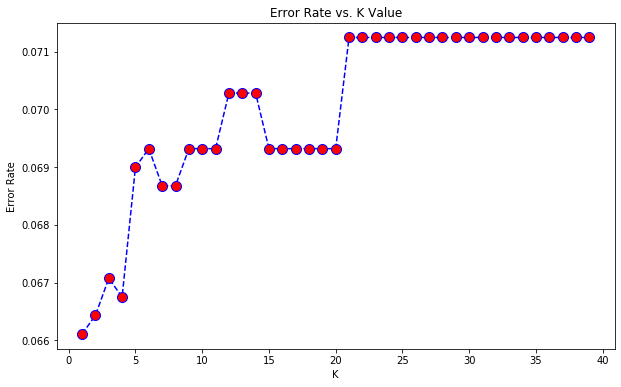

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(10,6))
# use 1-40 as x axis ans error_rate as y axis
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [98]:
# Instanciating the model using 1 neighbors, which seemed to return the highest knn score. 
knn = KNeighborsClassifier(n_neighbors=1)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)

0.9435535599743425

In [99]:
from sklearn.metrics import confusion_matrix, classification_report
# Create a KNN model with your choice of K
knn = KNeighborsClassifier(n_neighbors=1)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)
y_predict = knn.predict(X_test)

print('K=1')
print('\n')
print(confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test,y_predict))


K=1


[[  83   81]
 [   7 1388]]


              precision    recall  f1-score   support

           0       0.92      0.51      0.65       164
           1       0.94      0.99      0.97      1395

    accuracy                           0.94      1559
   macro avg       0.93      0.75      0.81      1559
weighted avg       0.94      0.94      0.94      1559



### filter out noises data and keepin certain  fetures we need 

In [100]:
better=final_data[['has_cert','longetivity','valid_cert','extended_validation','cert_age','multi_mtn',
                   'Network_private','Network_reserved','Network_link_local','Network_loop' ,'Network_unspecified',
                   'Network_global','Network_class_IPv4Network']]
better

,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,Network_private,Network_reserved,Network_link_local,Network_loop,Network_unspecified,Network_global,Network_class_IPv4Network
0,1,180,1,0,61,1,0,0,0,0,0,1,1
1,1,83,1,0,11,1,0,0,0,0,0,1,1
2,1,1100,1,0,826,1,0,0,0,0,0,1,1
3,1,74,1,0,61,1,0,0,0,0,0,1,1
4,1,83,1,0,11,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1,1095,1,0,542,0,0,0,0,0,0,1,1
1311,1,1095,1,0,542,0,0,0,0,0,0,1,1
1312,1,90,1,0,0,1,0,0,0,0,0,1,1
1313,1,90,1,0,0,1,0,0,0,0,0,1,1


In [101]:
X = final_data.iloc[:,:].values
y = (f["class"]== 'alexa').astype(np.int)

In [102]:
from sklearn.preprocessing import scale
X=scale(X)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
# Instanciating the model using 1 neighbors, which seemed to return the highest knn score. 
knn = KNeighborsClassifier(n_neighbors=1)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)

0.9486740804106074

Best accuracy score we got is 0.9516474112109542

In [104]:
y_test=y_test.tolist()

In [102]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
# Will take some time
for i in range(1,40):
    # create a knn classifier with n_neighbors equals i
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    # calculate the error rate and append to the error_rate list
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

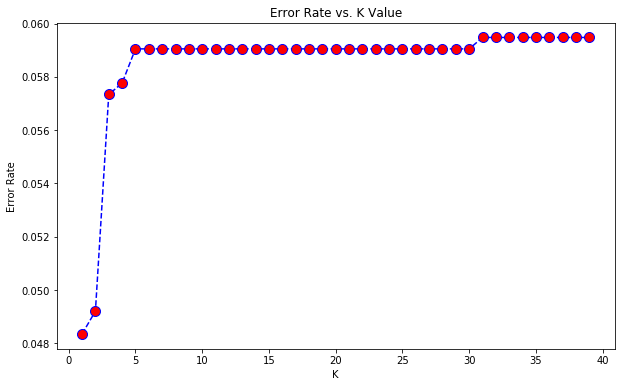

In [103]:
%matplotlib inline
plt.figure(figsize=(10,6))
# use 1-40 as x axis ans error_rate as y axis
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [107]:
# Instanciating the model using 1 neighbors, which seemed to return the highest knn score. 
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the training data.
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
# Determining how the model performs on the test data.
knn.score(X_test, y_test)
print('K=5')
print('\n')
print(confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test,y_predict))

K=5


[[  97  136]
 [   6 2099]]


              precision    recall  f1-score   support

           0       0.94      0.42      0.58       233
           1       0.94      1.00      0.97      2105

    accuracy                           0.94      2338
   macro avg       0.94      0.71      0.77      2338
weighted avg       0.94      0.94      0.93      2338



In [106]:
# Instanciating the model using 1 neighbors, which seemed to return the highest knn score. 
knn = KNeighborsClassifier(n_neighbors=1)

# Fitting the model on the training data.
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
# Determining how the model performs on the test data.
knn.score(X_test, y_test)
print('K=1')
print('\n')
print(confusion_matrix(y_test,y_predict))
print('\n')
print(classification_report(y_test,y_predict))

K=1


[[ 119  114]
 [   6 2099]]


              precision    recall  f1-score   support

           0       0.95      0.51      0.66       233
           1       0.95      1.00      0.97      2105

    accuracy                           0.95      2338
   macro avg       0.95      0.75      0.82      2338
weighted avg       0.95      0.95      0.94      2338



Confusion matrix and report(K=1,Alexa=0,Phish=1): the accuracy precision for Alexa is 96%,the accuracy precision for Phish is 95%

## preview work

In [49]:
# Changing the rawdata type so that we receive true/false values in the reshaped array. 
# False values are known phishing URLs.  True values are known good values from Alexa Internet Rankings.
alexa = pd.read_csv(r"C:\Users\ed2489\Desktop\knn\certificate features.alexa.csv")
phish = pd.read_csv(r"C:\Users\ed2489\Desktop\knn\certificate features.phish.csv")
a=pd.concat([alexa,phish])

In [50]:
X = a.iloc[:,1:-3].values
y = (a["class"] == 'alexa').astype(np.int)

In [51]:
from sklearn.preprocessing import scale
X=scale(X)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# best k normally from 3-10
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors
for i in (3,4,5,6,7,8,9,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores=cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    print("mean of scores",np.mean(scores),"n_neighbors=%d" % i)
   

mean of scores 0.8810818879441724 n_neighbors=3
mean of scores 0.8814223134760872 n_neighbors=4
mean of scores 0.8800613345502702 n_neighbors=5
mean of scores 0.8800613345502702 n_neighbors=6
mean of scores 0.8790407811563679 n_neighbors=7
mean of scores 0.8790407811563679 n_neighbors=8
mean of scores 0.8790407811563679 n_neighbors=9
mean of scores 0.8790407811563679 n_neighbors=10


In [53]:
# Instanciating the model using 5 neighbors, which seemed to return the highest knn score. 
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)

0.8793650793650793

In [54]:
# All Variables
X1 = a.iloc[:,1:7].values
y = (a["class"] == 'alexa').astype(np.int)

In [55]:
from sklearn.preprocessing import scale
X1=scale(X1)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [56]:
# best k normally from 3-10
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors
for i in (3,4,5,6,7,8,9,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores=cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    print("mean of scores",np.mean(scores),"n_neighbors=%d" % i)
   

mean of scores 0.9057758704747721 n_neighbors=3
mean of scores 0.9011610023756338 n_neighbors=4
mean of scores 0.9042863347870794 n_neighbors=5
mean of scores 0.9020543027337518 n_neighbors=6
mean of scores 0.9001184492784455 n_neighbors=7
mean of scores 0.8968437533241145 n_neighbors=8
mean of scores 0.8928252313583661 n_neighbors=9
mean of scores 0.8883585079601461 n_neighbors=10


## Best score I get so far

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)

0.9291666666666667

In [58]:
##has_cer
X11 = a.iloc[:,1:2].values
y = (a["class"] == 'alexa').astype(np.int)

In [59]:
from sklearn.preprocessing import scale
X11=scale(X11)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X11, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)

0.8428571428571429

In [60]:
##### longetivity  
X2 = a.iloc[:,2:3].values
y = (a["class"] == 'alexa').astype(np.int)

In [61]:
from sklearn.preprocessing import scale
X2=scale(X2)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)

0.8732142857142857

In [62]:
##### valid_cert 
X3 = a.iloc[:,5:6].values
y = (a["class"] == 'alexa').astype(np.int)

In [63]:
from sklearn.preprocessing import scale
X3=scale(X3)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)

0.8607142857142858

In [64]:
##### multi_mtn
X4 = a.iloc[:,6:7].values
y = (a["class"] == 'alexa').astype(np.int)

In [65]:
from sklearn.preprocessing import scale
X4=scale(X4)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)

0.8428571428571429

In [66]:
##### extended_validation
X5 = a.iloc[:,3:4].values
y = (a["class"] == 'alexa').astype(np.int)

In [67]:
from sklearn.preprocessing import scale
X5=scale(X5)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the training data.
knn.fit(X_train, y_train)

# Determining how the model performs on the test data.
knn.score(X_test, y_test)

0.8428571428571429

In [68]:
d=a.astype({"class":'object'})
d["class"] = (d["class"] == "alexa")
d.head()

,domain,has_cert,longetivity,valid_cert,extended_validation,cert_age,multi_mtn,globalsign nv-sa,google inc,gandi,...,wponabudget.com,reviews-by.ml,sewaknepal.org,watchvslivestreamtv.club,nehanaxane.ga,alexis-collins10.tk,laborindonesia.com,egdemo.info,theflatbellydrink.com,class
0,www.yahoo.com,True,180,True,False,61,True,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,www.google.co.in,True,83,True,False,11,True,0,1,0,...,0,0,0,0,0,0,0,0,0,True
2,www.reddit.com,True,1100,True,False,826,True,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,world.taobao.com,True,74,True,False,61,True,1,0,0,...,0,0,0,0,0,0,0,0,0,True
4,www.google.co.jp,True,83,True,False,11,True,0,1,0,...,0,0,0,0,0,0,0,0,0,True


In [69]:
y = d.iloc[:,-1].values
y

array([ True,  True,  True, ..., False, False, False])

In [70]:
y.reshape((8398,))

array([ True,  True,  True, ..., False, False, False])

In [71]:
# Function for producing logarithmic scales of inputted phishing data. 
def figure_1(y,X):
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # Creating lists to store values for boxplots
    alexa_values = []
    phish_values = []
    for i in range(len(y)):
        if y[i] == True:
            alexa_values.append(float(X[i]))
        else:
            phish_values.append(float(X[i]))

    # Inputting extremely small value to substitute for 0 so that we can use log
    for j in alexa_values:
        if j == 0:
            j += 10**-10
    
    for k in phish_values:
        if k == 0:
            k += 10**-10
    
    # Creating boxplots for both alexa and phish values.  
    # I'm using the log of each list to replicate paper (i.e., y axis of Count (Logarithmic Scale))
    fig = plt.figure(figsize=(18, 6))

    ax = plt.subplot(1, 3, 1)
    ax.boxplot(np.log(alexa_values))
    ax.set_title('Alexa')

    ax = plt.subplot(1, 3, 2)
    ax.boxplot(np.log(phish_values))
    ax.set_title('Phish')

    plt.show()

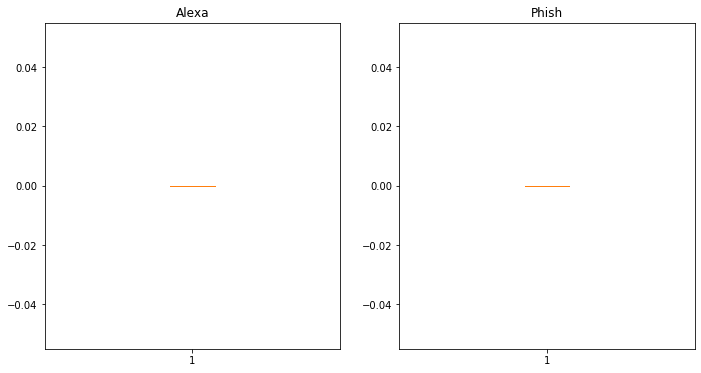

In [73]:
## has_cert  mean they all have certi
X = d.iloc[:,1:2].values
y = d.iloc[:,-1].values
figure_1(y,X)

Comparison of Certificate Longevity Period between legitimate and  phishing websites

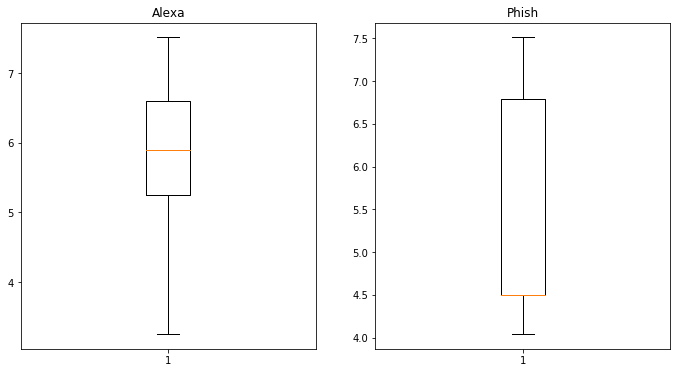

In [74]:
## write a report 
X = d.iloc[:,2:3].values
y = d.iloc[:,-1].values
figure_1(y,X)

repicate the result and why use the box plot 

In [ ]:
#### they all have vaild 
X = d.iloc[:,3:4].values
y = d.iloc[:,-1].values
figure_1(y,X)

 Comparison of Is Passing Browser Validation between legitimate and  phishing websites

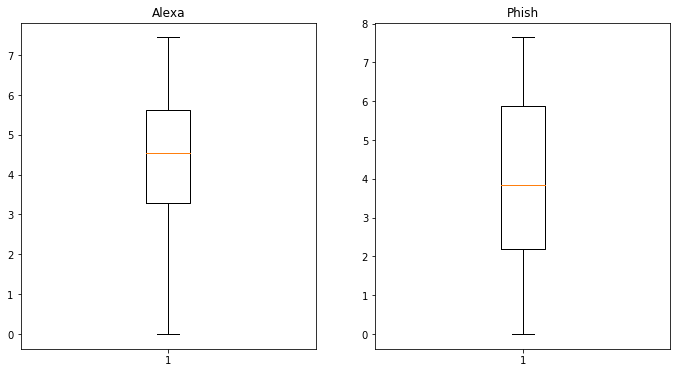

In [75]:
X = d.iloc[:,5:6].values
y = d.iloc[:,-1].values


figure_1(y,X)

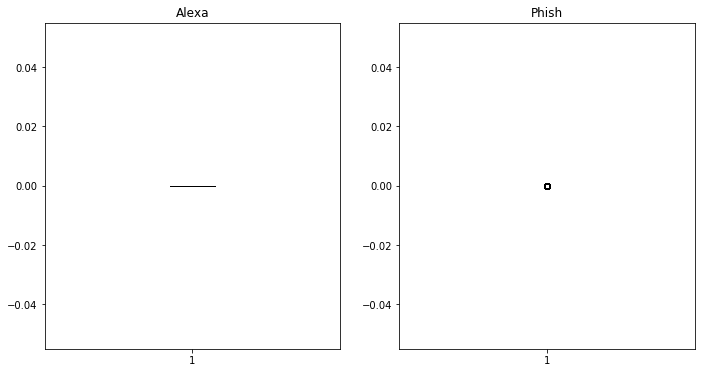

In [76]:
X = d.iloc[:,6:7].values
y = d.iloc[:,-1].values
figure_1(y,X)

 Certificate feature examination.  This involves splitting the certificate sources between well-known and obscure sources to see how they compare in regards to being a malicious or non-malicious URL.  Ranking source trustworthiness based on association with tagged phishing attempts is also included. 